<a href="https://colab.research.google.com/github/HDS07/Deep-learning-/blob/main/Secondhandcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [7]:
df=pd.read_csv('/content/drive/MyDrive/testcars.csv')

In [9]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12/9/2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,1/12/2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11/8/2021,4.3


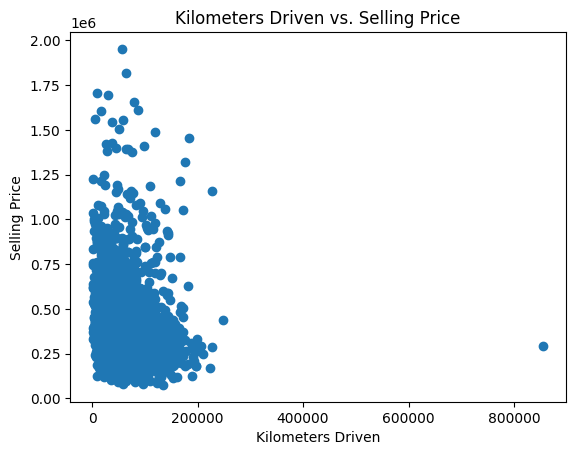

In [8]:
plt.scatter(df['Kilometers Driven'], df['Selling Price'])
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Kilometers Driven vs. Selling Price')
plt.show()

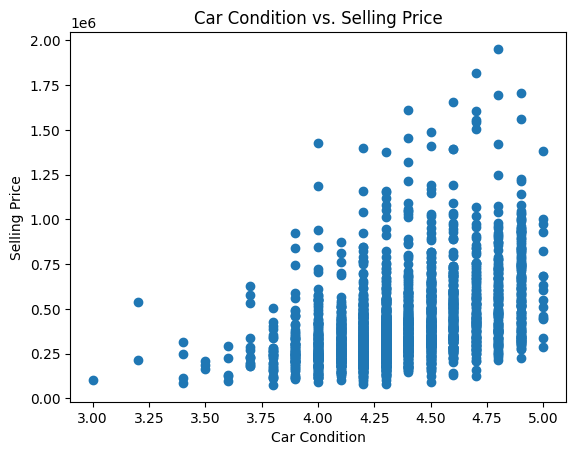

In [10]:
plt.scatter(df['Car Condition'], df['Selling Price'])
plt.xlabel('Car Condition')
plt.ylabel('Selling Price')
plt.title('Car Condition vs. Selling Price')
plt.show()

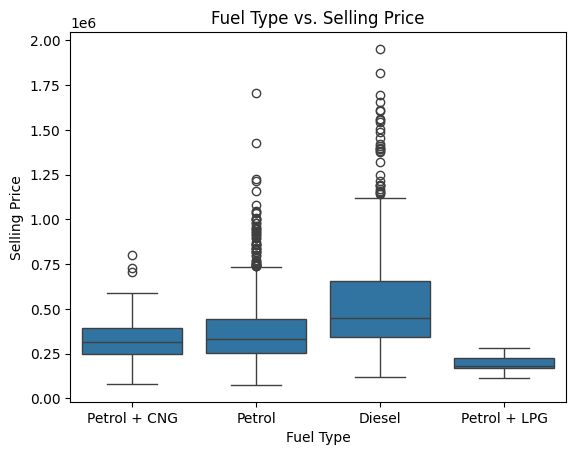

In [12]:
sns.boxplot(x='Fuel Type', y='Selling Price', data=df)
plt.title('Fuel Type vs. Selling Price')
plt.show()

In [14]:
df

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12/9/2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,1/12/2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11/8/2021,4.3
...,...,...,...,...,...,...,...,...,...
2232,MarutiWagonR1.0,385999,45263,2015,Second Owner,Petrol,MANUAL,10/6/2021,4.4
2233,MarutiSwift,324099,100335,2012,Second Owner,Petrol,MANUAL,2/8/2021,4.3
2234,HyundaiEonD,212299,28016,2011,First Owner,Petrol,MANUAL,Expired,3.2
2235,FordEcosport1.5AMBIENTE,378899,87947,2013,First Owner,Diesel,MANUAL,3/9/2021,4.2


In [15]:
df.dropna(inplace=True)

In [16]:
df['Car Age'] = 2024 - df['Year']

In [17]:
df = df.drop(['Year', 'Model', 'Insurance'], axis=1)

In [18]:
X = df.drop('Selling Price', axis=1)
y = df['Selling Price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
numeric_features = ['Kilometers Driven', 'Car Condition', 'Car Age']
categorical_features = ['Owner', 'Fuel Type', 'Transmission']

In [21]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])


In [22]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [24]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [25]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Kilometers Driven',
                                                   'Car Condition',
                                                   'Car Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Owner', 'Fuel Type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [26]:
y_pred = model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 115048.64874157302
Root Mean Squared Error: 180788.23590428516
R-squared: 0.38206239102977646


In [29]:
joblib.dump(model, 'car_price_predictor_model.pkl')

['car_price_predictor_model.pkl']

In [30]:
import joblib
import pandas as pd

In [31]:
model = joblib.load('car_price_predictor_model.pkl')

In [32]:
def get_user_input():
    kilometers_driven = float(input("Enter the kilometers driven: "))
    owner = input("Enter the owner status (e.g., 'First Owner', 'Second Owner'): ")
    fuel_type = input("Enter the fuel type (e.g., 'Petrol', 'Diesel', 'Petrol + CNG'): ")
    transmission = input("Enter the transmission type (e.g., 'MANUAL', 'AUTOMATIC'): ")
    car_condition = float(input("Enter the car condition (e.g., 4.5): "))
    year = int(input("Enter the year of manufacture: "))


    car_age = 2024 - year


    input_data = pd.DataFrame({
        'Kilometers Driven': [kilometers_driven],
        'Owner': [owner],
        'Fuel Type': [fuel_type],
        'Transmission': [transmission],
        'Car Condition': [car_condition],
        'Car Age': [car_age]
    })

    return input_data

In [33]:
user_data = get_user_input()

Enter the kilometers driven: 4500
Enter the owner status (e.g., 'First Owner', 'Second Owner'): First owner
Enter the fuel type (e.g., 'Petrol', 'Diesel', 'Petrol + CNG'): petrol
Enter the transmission type (e.g., 'MANUAL', 'AUTOMATIC'): automatic
Enter the car condition (e.g., 4.5): 4.5
Enter the year of manufacture: 2018


In [34]:
predicted_price = model.predict(user_data)


print(f'Predicted Selling Price: {predicted_price[0]:,.2f}')

Predicted Selling Price: 494,748.62
